# Filtre de Sobel

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

from scipy import ndimage
from scipy import signal

from skimage import io

from skimage import filters

In [4]:
import mrlab as mr

## Filtro passa-baixa

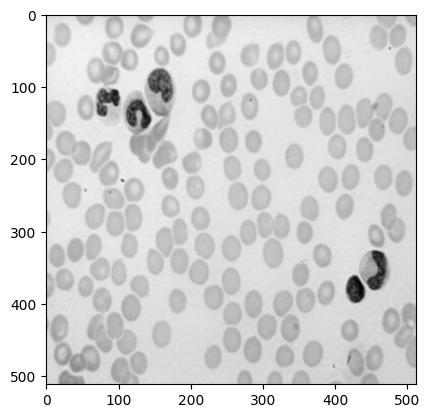

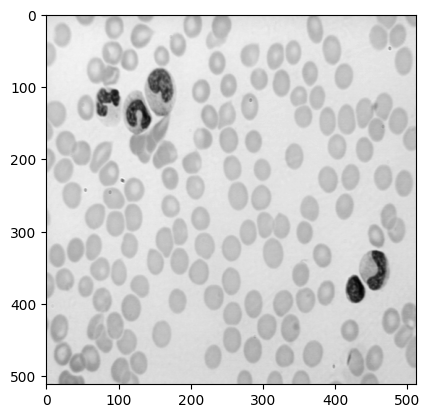

In [5]:
ima=io.imread('cell.tif')
sigma=0
seuilnorme=0.1

gfima=filters.gaussian(ima,sigma)

plt.figure('Image originale')
plt.imshow(ima, cmap='gray')

plt.figure('Image filtrée (passe-bas)')
plt.imshow(gfima, cmap='gray')

## Gradiente

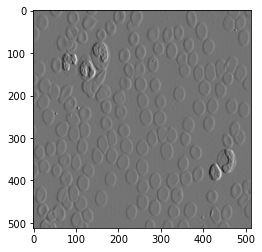

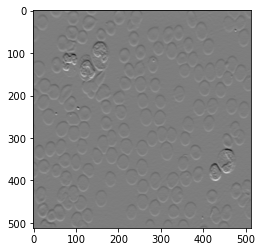

In [4]:
gradx=mr.sobelGradX(gfima)
grady=mr.sobelGradY(gfima)  
      
plt.figure('Gradient horizontal')
plt.imshow(gradx, cmap='gray')

plt.figure('Gradient vertical')
plt.imshow(grady, cmap='gray')

### Norma do Gradiente

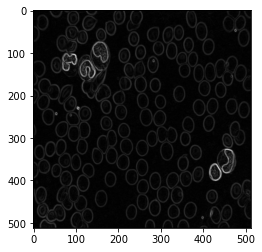

In [5]:
norme=np.sqrt(gradx*gradx+grady*grady)

plt.figure('Norme du gradient')
plt.imshow(norme, cmap='gray')

### Direção do Gradiente

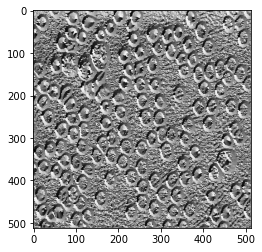

In [6]:
direction=np.arctan2(grady,gradx)
    
plt.figure('Direction du Gradient')
plt.imshow(direction, cmap='gray')

### Seuil na norma do gradiente

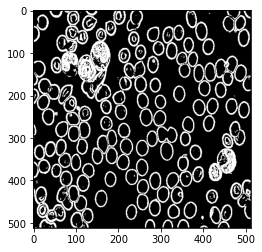

In [8]:
contoursnorme =(norme>seuilnorme) 

plt.figure('Norme seuillée')
plt.imshow(255*contoursnorme, cmap='gray')

### Seuil na norma do máximo gradiente da direção 

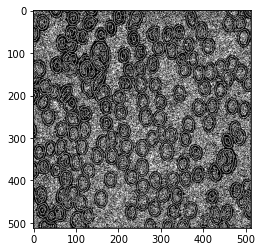

In [12]:
contours=np.uint8(mr.maximaDirectionGradient(gradx,grady))

plt.figure('Maxima du gradient dans la direction du gradient')
plt.imshow(255*contours, cmap='gray')

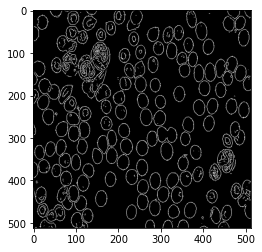

In [11]:
seuilnorme=0.1

valcontours=(norme>seuilnorme)*contours
      
plt.figure()
plt.imshow(255*valcontours, cmap='gray')
plt.show()

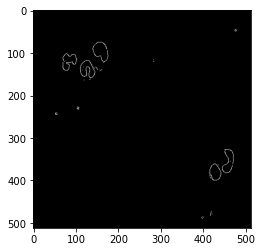

In [13]:
seuilnorme=0.5

valcontours=(norme>seuilnorme)*contours
      
plt.figure()
plt.imshow(255*valcontours, cmap='gray')
plt.show()

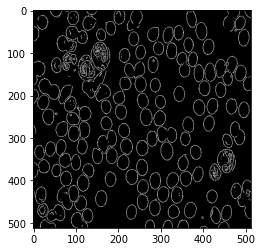

In [20]:
seuilnorme=0.15

valcontours=(norme>seuilnorme)*contours
      
plt.figure()
plt.imshow(255*valcontours, cmap='gray')
plt.show()

## Filtre récursif de Deriche

Text(0.5, 1.0, 'alpha=3')

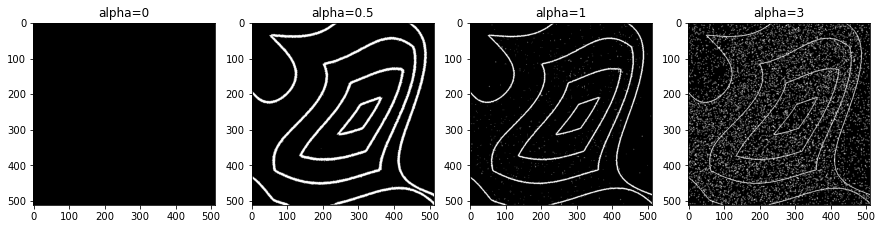

In [51]:
ima = io.imread('pyrabruit.tif')
alpha = [0,0.5,1,3]

gradx = [mr.dericheGradX(ima,a) for a in alpha]
grady = [mr.dericheGradY(ima,a) for a in alpha]
norme_grad = []

for i,gx in enumerate(gradx):
    gy = grady[i]
    norme_grad.append(np.sqrt(gx**2 + gy**2))

seuil = 30
seuil_norm = (np.array(norme_grad)>=seuil) 


fig, ax = plt.subplots(1,4, figsize=(15,15))

ax[0].imshow(seuil_norm[0], cmap='gray')
ax[1].imshow(seuil_norm[1], cmap='gray')
ax[2].imshow(seuil_norm[2], cmap='gray')
ax[3].imshow(seuil_norm[3], cmap='gray')


ax[0].set_title('alpha=0')
ax[1].set_title('alpha=0.5')
ax[2].set_title('alpha=1')
ax[3].set_title('alpha=3')

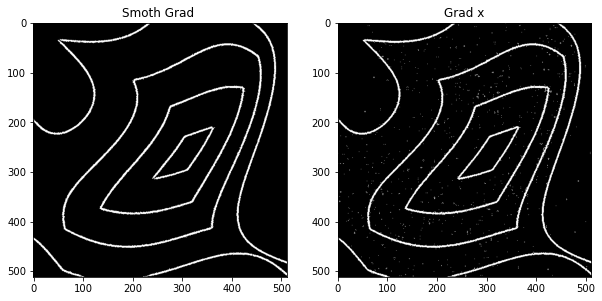

In [58]:
#Smooth avant le filtre de deriche
alpha = 1

smoothx = mr.dericheSmoothX(ima, alpha)
smoothy = mr.dericheSmoothY(ima, alpha)

gradx_smooth = mr.dericheGradX(smoothx, alpha)
grady_smooth = mr.dericheGradY(smoothy, alpha)

norme_grad_smooth = []

for i,gx in enumerate(gradx_smoth):
    gy = grady_smooth[i]
    norme_grad_smooth.append(np.sqrt(gx**2 + gy**2))

seuil = 30
seuil_norm_smooth = (np.array(norme_grad_smooth)>=seuil) 

fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].set_title('Smoth Grad ')
ax[1].set_title('Grad x')


ax[0].imshow(seuil_norm_smooth, cmap='gray')
ax[1].imshow(seuil_norm[2], cmap='gray')

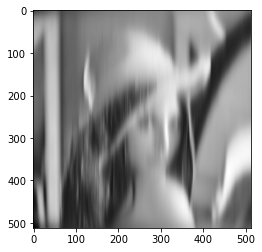

In [143]:
# sensação de movimento?
grady_smoth = mr.dericheSmoothY(ima, alpha)
plt.imshow(grady_smoth,cmap='gray')

## Laplacien

In [69]:
ima_original=io.imread('cell.tif')

In [64]:
alpha=0.5

#derivada primeira
gradx=mr.dericheGradX(mr.dericheSmoothY(ima,alpha),alpha)
grady=mr.dericheGradY(mr.dericheSmoothX(ima,alpha),alpha)  

#derivada segunda
gradx2=mr.dericheGradX(mr.dericheSmoothY(gradx,alpha),alpha)
grady2=mr.dericheGradY(mr.dericheSmoothX(grady,alpha),alpha)  

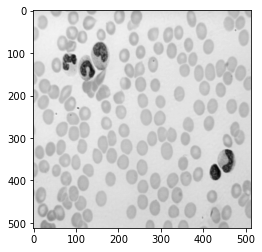

In [24]:
plt.figure('Image originale')
plt.imshow(ima, cmap='gray')

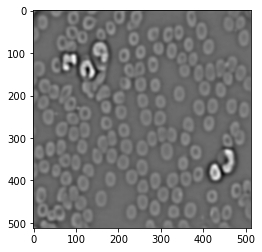

In [25]:
lpima=gradx2+grady2 #gradiente

plt.figure('Laplacien')
plt.imshow(lpima, cmap='gray')

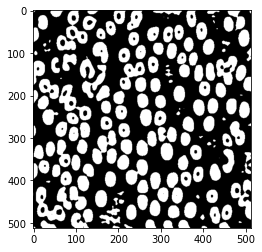

In [26]:
posneg=(lpima>=0) #detecta variação de sentido do gradiente 

plt.figure('Laplacien binarisé -/+')
plt.imshow(255*posneg, cmap='gray')

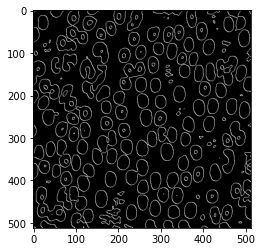

In [28]:
nl,nc=ima.shape
contours=np.uint8(np.zeros((nl,nc)))

#confere se o pixel da esquerda ou o de cima é diferente. se for é um contorno.
for i in range(1,nl):
    for j in range(1,nc):
        if (((i>0) and (posneg[i-1,j] != posneg[i,j])) or
            ((j>0) and (posneg[i,j-1] != posneg[i,j]))):  
            contours[i,j]=255

plt.figure('Contours')
plt.imshow(contours, cmap='gray')

### Avalianda variação do $\alpha$

In [65]:
alpha=[0.1,0.5,1]

list_contours = []

for a in alpha:
    #derivada primeira
    gradx=mr.dericheGradX(mr.dericheSmoothY(ima,a),a)
    grady=mr.dericheGradY(mr.dericheSmoothX(ima,a),a)      

    #derivada segunda
    gradx2=mr.dericheGradX(mr.dericheSmoothY(gradx,a),a)
    grady2=mr.dericheGradY(mr.dericheSmoothX(grady,a),a)  

    lpima= gradx2+grady2
    posneg=(lpima>=0)

    nl,nc=ima.shape
    contours=np.uint8(np.zeros((nl,nc)))

    #confere se o pixel da esquerda ou o de cima é diferente. se for é um contorno.
    for i in range(1,nl):
        for j in range(1,nc):
            if (((i>0) and (posneg[i-1,j] != posneg[i,j])) or
                ((j>0) and (posneg[i,j-1] != posneg[i,j]))):  
                contours[i,j]=255
    #salvando resultado na lista de contronos           
    list_contours.append(contours) 



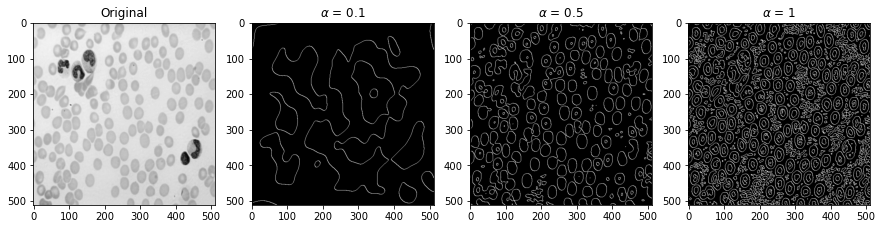

In [71]:
fig, ax = plt.subplots(1, 4,figsize=(15,15))
ax[0].imshow(ima_original, cmap='gray')
ax[0].set_title("Original")
for i,a in enumerate(alpha):
    ax[i+1].imshow(list_contours[i], cmap='gray')
    ax[i+1].set_title(fr"$\alpha$ = {a}")

Sur l’image pyramide.tif, comment est-il possible de supprimer les faux con-
tours créés par cette approche ?

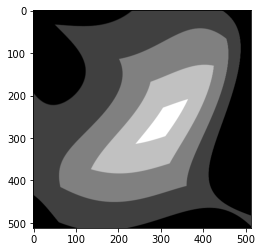

In [73]:
ima = plt.imread("./pyramide.tif")
plt.imshow(ima, cmap='gray')

In [115]:
alpha=0.5

#derivada primeira
gradx=mr.dericheGradX(mr.dericheSmoothY(ima,alpha),alpha)
grady=mr.dericheGradY(mr.dericheSmoothX(ima,alpha),alpha)  
grad = np.sqrt(gradx**2+grady**2)

#derivada segunda
gradx2=mr.dericheGradX(mr.dericheSmoothY(gradx,alpha),alpha)
grady2=mr.dericheGradY(mr.dericheSmoothX(grady,alpha),alpha)  
lpima= gradx2+grady2

#binarizando
posneg=(lpima>=0)

nl,nc=ima.shape
contours=np.uint8(np.zeros((nl,nc)))

#confere se o pixel da esquerda ou o de cima é diferente. se for é um contorno.
for i in range(1,nl):
    for j in range(1,nc):
        if ((((i>0) and (posneg[i-1,j] != posneg[i,j])) or
            ((j>0) and (posneg[i,j-1] != posneg[i,j]))) and grad[i,j]>=1.5):  #adição do limite inferior do gradiente
            contours[i,j]=255

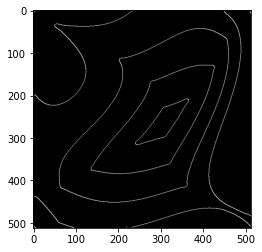

In [116]:
plt.imshow(contours, cmap='gray')

## 1.5 Changez d'image

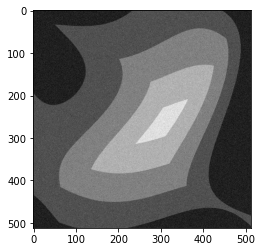

In [68]:
im = plt.imread("./pyra-gauss.tif")
plt.imshow(im, cmap='gray')

## 2 Seuillage pour hysterèsis 

In [1]:
import matplotlib.pyplot as plt
from skimage import data, filters
from skimage import io as skio
from scipy import ndimage
import mrlab as mr

# POUR LA MORPHO
import skimage.morphology as morpho  
import skimage.feature as skf
from scipy import ndimage as ndi

In [2]:
def tophat(im,rayon):
    se=morpho.square(rayon)
    ero=morpho.erosion(im,se)
    dil=morpho.dilation(ero,se)
    tophat=im-dil
    return tophat

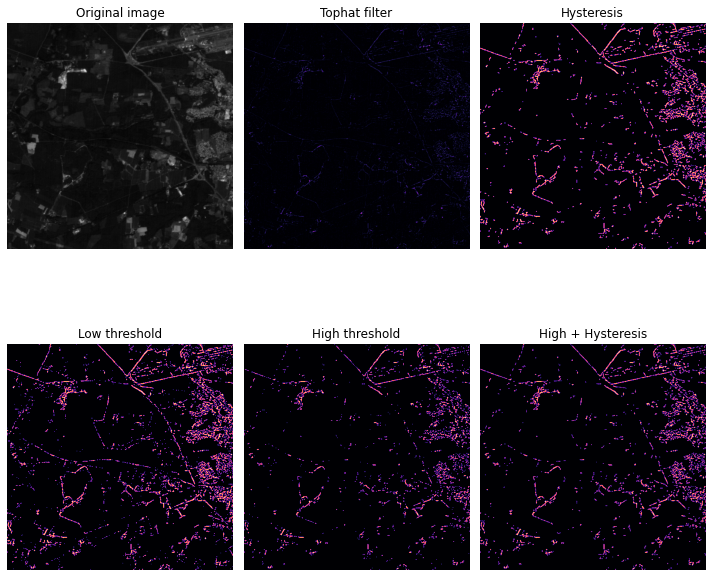

In [14]:
ima = skio.imread('spot.tif');
rayon=3
top=tophat(ima,rayon)

low = 3
high = 5

lowt = (top > low).astype(int)
hight = (top > high).astype(int)
hyst = filters.apply_hysteresis_threshold(top, low, high)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

ax[0, 0].imshow(ima, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(top, cmap='magma')
ax[0, 1].set_title('Tophat filter')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight, cmap='magma')
ax[1, 1].set_title('High threshold')

ax[0, 2].imshow(hyst, cmap='magma')
ax[0, 2].set_title('Hysteresis')

ax[1, 2].imshow(hight + hyst, cmap='magma')
ax[1, 2].set_title('High + Hysteresis')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()


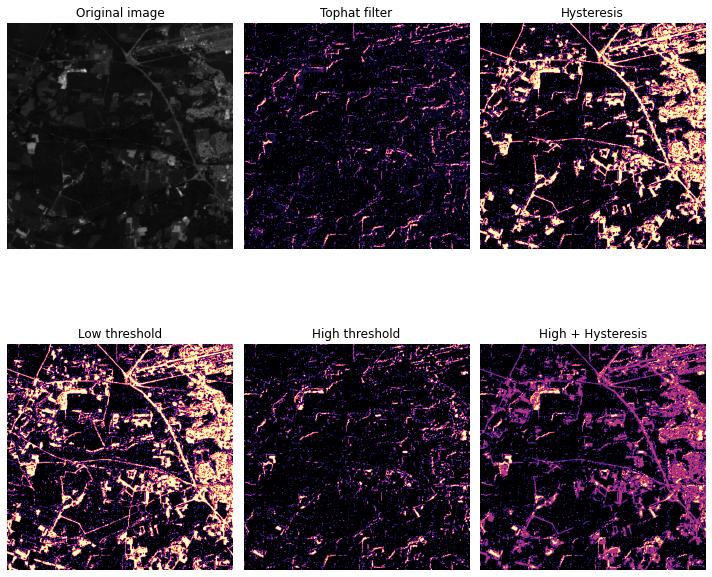

In [94]:
ima = skio.imread('spot.tif');
rayon=10
top=tophat(ima,rayon)

low = 3
high = 20

lowt = (top > low).astype(int)
hight = (top > high).astype(int)
hyst = filters.apply_hysteresis_threshold(top, low, high)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

ax[0, 0].imshow(ima, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(top, cmap='magma')
ax[0, 1].set_title('Tophat filter')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight, cmap='magma')
ax[1, 1].set_title('High threshold')

ax[0, 2].imshow(hyst, cmap='magma')
ax[0, 2].set_title('Hysteresis')

ax[1, 2].imshow(hight + hyst, cmap='magma')
ax[1, 2].set_title('High + Hysteresis')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()


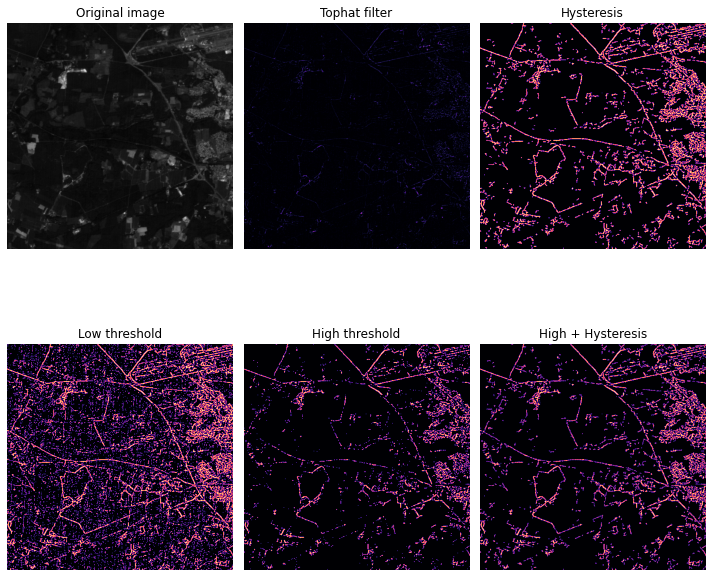

In [53]:
ima = skio.imread('spot.tif');
rayon=3
top=tophat(ima,rayon)

low = 1.5
high = 3

lowt = (top > low).astype(int)
hight = (top > high).astype(int)
hyst = filters.apply_hysteresis_threshold(top, low, high)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

ax[0, 0].imshow(ima, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(top, cmap='magma')
ax[0, 1].set_title('Tophat filter')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight, cmap='magma')
ax[1, 1].set_title('High threshold')

ax[0, 2].imshow(hyst, cmap='magma')
ax[0, 2].set_title('Hysteresis')

ax[1, 2].imshow(hight + hyst, cmap='magma')
ax[1, 2].set_title('High + Hysteresis')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()


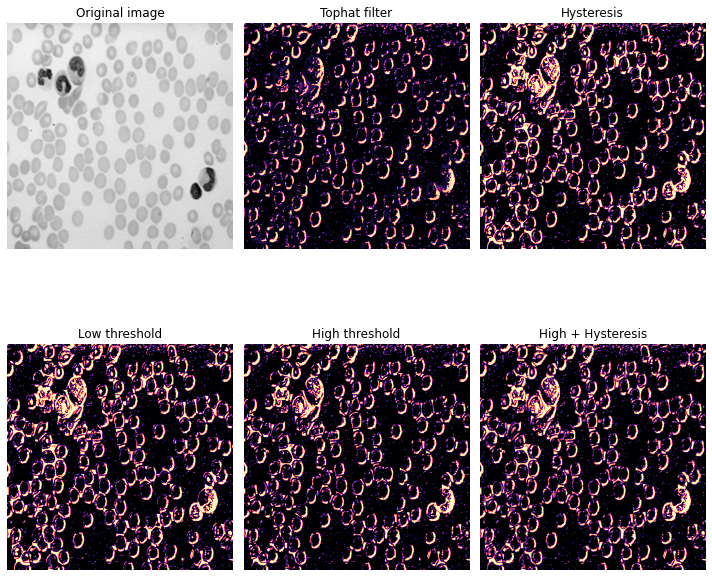

In [175]:
ima = skio.imread('cell.tif');
rayon= 10
top=tophat(ima,rayon)

low = 10
high = 15

lowt = (top > low).astype(int)
hight = (top > high).astype(int)
hyst = filters.apply_hysteresis_threshold(top, low, high)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

ax[0, 0].imshow(ima, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(top, cmap='magma')
ax[0, 1].set_title('Tophat filter')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight, cmap='magma')
ax[1, 1].set_title('High threshold')

ax[0, 2].imshow(hyst, cmap='magma')
ax[0, 2].set_title('Hysteresis')

ax[1, 2].imshow(hight + hyst, cmap='magma')
ax[1, 2].set_title('High + Hysteresis')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()


## K-means

In [176]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-

# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from skimage.io import imread


In [177]:
n_class = 2

ima=imread('cell.tif')
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
ima = np.array(ima, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(ima.shape)
d = 1
image_array = np.reshape(ima, (w * h, d))

In [178]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_class, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

Fitting model on a small sub-sample of the data
done in 0.786s.


In [179]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


Predicting color indices on the full image (k-means)
done in 0.991s.


In [8]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    image = np.zeros((w, h))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

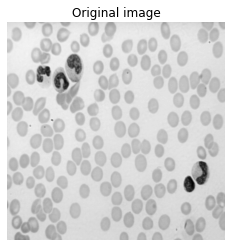

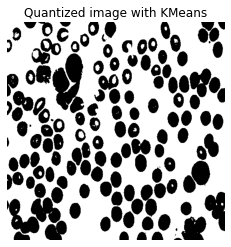

In [181]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(ima,cmap='gray')

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with KMeans')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h),cmap='gray')
plt.show()

Fitting model on a small sub-sample of the data
done in 0.025s.
Predicting color indices on the full image (k-means)
done in 0.004s.


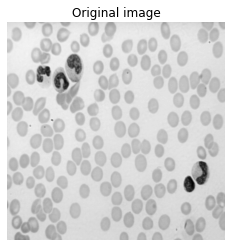

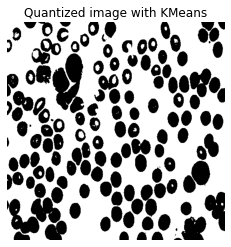

In [183]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_class, random_state=1).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(ima,cmap='gray')

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with KMeans')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h),cmap='gray')
plt.show()

Fitting model on a small sub-sample of the data
done in 0.032s.
Predicting color indices on the full image (k-means)
done in 0.013s.


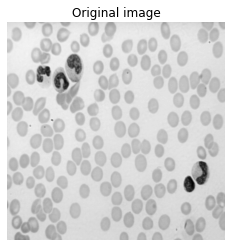

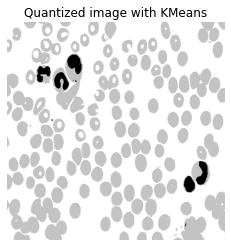

In [189]:
n_class = 3
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_class, random_state=None).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(ima,cmap='gray')

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with KMeans')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h),cmap='gray')
plt.show()

Fitting model on a small sub-sample of the data
done in 0.054s.
Predicting color indices on the full image (k-means)
done in 0.020s.


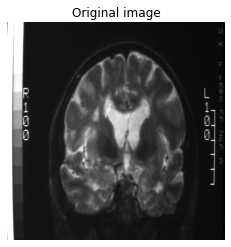

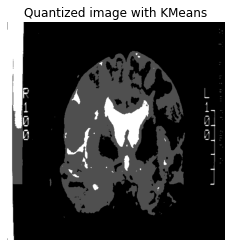

In [212]:
n_class = 10

ima=imread('brain.tif')
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
ima = np.array(ima, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(ima.shape)
d = 1
image_array = np.reshape(ima, (w * h, d))

n_class = 3
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_class, random_state=None).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(ima,cmap='gray')

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with KMeans')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h),cmap='gray')
plt.show()

Fitting model on a small sub-sample of the data
done in 0.035s.
Predicting color indices on the full image (k-means)
done in 0.002s.


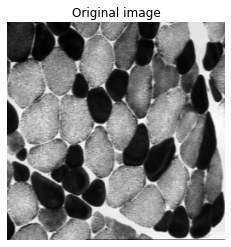

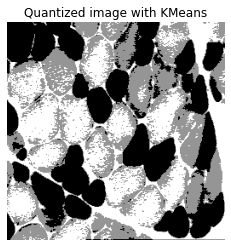

In [214]:
n_class = 3

ima=imread('muscle.tif')
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
ima = np.array(ima, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(ima.shape)
d = 1
image_array = np.reshape(ima, (w * h, d))

n_class = 3
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_class, random_state=None).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(ima,cmap='gray')

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with KMeans')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h),cmap='gray')
plt.show()

Fitting model on a small sub-sample of the data
done in 0.304s.
Predicting color indices on the full image (k-means)
done in 0.021s.


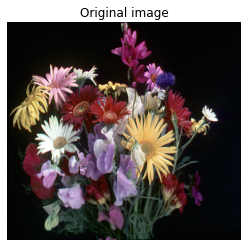

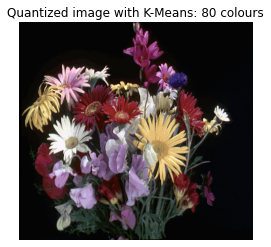

In [244]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-

# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from skimage.io import imread

n_colors = 80

ima = imread("fleur.tif")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
ima = np.array(ima, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(ima.shape)
assert d == 3
image_array = np.reshape(ima, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(ima)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with K-Means: %i colours' %n_colors)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()



Fitting model on a small sub-sample of the data
done in 0.026s.
Predicting color indices on the full image (k-means)
done in 0.010s.


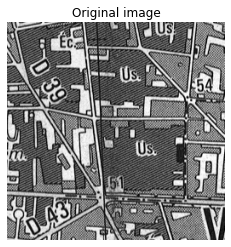

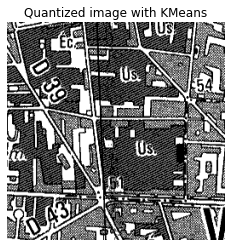

In [246]:
n_class = 3

ima=imread('carte.tif')
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
ima = np.array(ima, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(ima.shape)
d = 1
image_array = np.reshape(ima, (w * h, d))

n_class = 3
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_class, random_state=None).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(ima,cmap='gray')

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with KMeans')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h),cmap='gray')
plt.show()

Fitting model on a small sub-sample of the data
done in 0.078s.
Predicting color indices on the full image (k-means)
done in 0.003s.


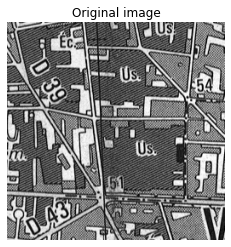

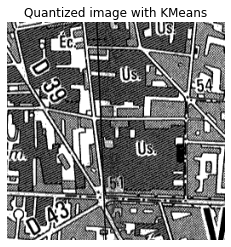

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from skimage.io import imread

n_class = 5

ima= imread('carte.tif')
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
ima = np.array(ima, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(ima.shape)
d = 1
image_array = np.reshape(ima, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_class, random_state=None).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(ima,cmap='gray')

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with KMeans')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h),cmap='gray')
plt.show()

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 30 15:22:20 2020

@author: mroux
"""

import matplotlib.pyplot as plt
from skimage import data
from skimage import io as skio
from skimage.filters import threshold_otsu
import numpy as np

In [ ]:
def histogram(im):
    
    nl,nc=im.shape
    
    hist=np.zeros(256)
    
    for i in range(nl):
        for j in range(nc):
            hist[im[i][j]]=hist[im[i][j]]+1
            
    for i in range(256):
        hist[i]=hist[i]/(nc*nl)
        
    return(hist)

In [ ]:
def otsu_thresh(im):
    
    h=histogram(im)
    
    m=0
    for i in range(256):
        m=m+i*h[i]
    
    maxt=0
    maxk=0
    
    
    for t in range(256):
        w0=0
        w1=0
        m0=0
        m1=0
        for i in range(t):
            w0=w0+h[i]
            m0=m0+i*h[i]
        if w0 > 0:
            m0=m0/w0
        
        for i in range(t,256):
            w1=w1+h[i]
            m1=m1+i*h[i]
        if w1 > 0:   
            m1=m1/w1
        
        k=w0*w1*(m0-m1)*(m0-m1)    
        
        if k > maxk:
            maxk=k
            maxt=t
            
            
    thresh=maxt
        
    return(thresh)


152
153


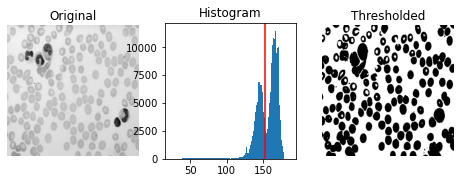

In [247]:
image = skio.imread('cell.tif')
thresh = threshold_otsu(image)
print(thresh)
binary = image > thresh

thresh=otsu_thresh(image)
binary = image > thresh
print(thresh)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

bins=np.max(image)-np.min(image)+1

ax[1].hist(image.ravel(), bins=bins)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()



104
105


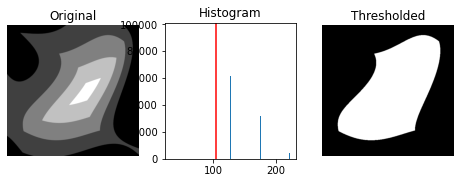

In [248]:
image = skio.imread('pyramide.tif')
thresh = threshold_otsu(image)
print(thresh)
binary = image > thresh

thresh=otsu_thresh(image)
binary = image > thresh
print(thresh)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

bins=np.max(image)-np.min(image)+1

ax[1].hist(image.ravel(), bins=bins)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()



96
97


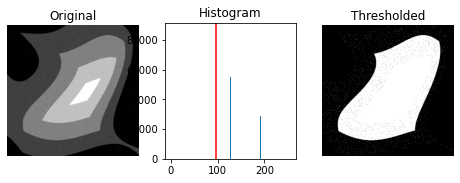

In [250]:
image = skio.imread('pyrabruit.tif')
thresh = threshold_otsu(image)
print(thresh)
binary = image > thresh

thresh=otsu_thresh(image)
binary = image > thresh
print(thresh)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

bins=np.max(image)-np.min(image)+1

ax[1].hist(image.ravel(), bins=bins)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()


33
34


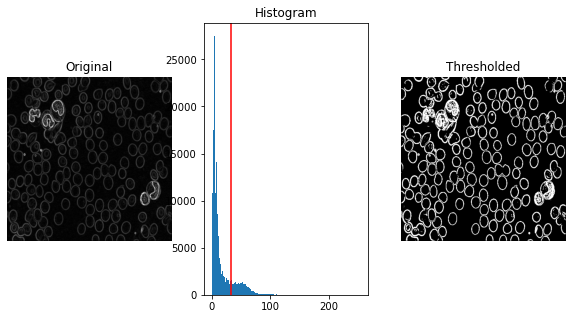

In [259]:
ima = skio.imread('cell.tif')
gradx=mr.sobelGradX(ima)
grady=mr.sobelGradY(ima)  
      
norme=np.sqrt(gradx*gradx+grady*grady)
image = np.uint8(norme)

thresh = threshold_otsu(image)
print(thresh)
binary = image > thresh

thresh=otsu_thresh(image)
binary = image > thresh
print(thresh)

fig, axes = plt.subplots(ncols=3, figsize=(10, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

bins=np.max(image)-np.min(image)+1

ax[1].hist(image.ravel(), bins=bins)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

[ 28 104]


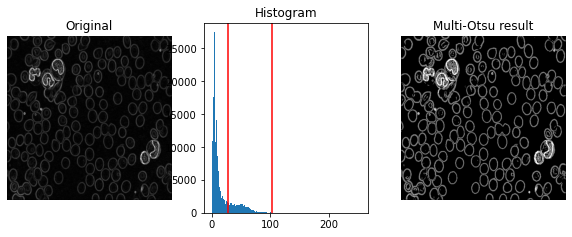

In [267]:
from skimage.filters import threshold_multiotsu

ima = skio.imread('pyramide.tif')

image = np.uint8(norme)

thresh = threshold_multiotsu(image)
print(thresh)

regions = np.digitize(image, bins=thresh)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for t in thresh:
    ax[1].axvline(t, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='gray')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()
plt.show()

In [272]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 24 13:41:50 2020

@author: mroux
"""

import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio
from scipy import ndimage

#Pour affichage rapide
import cv2

# POUR LA MORPHO
import skimage.morphology as morpho  
import skimage.feature as skf
from scipy import ndimage as ndi

ModuleNotFoundError: No module named 'cv2'

In [268]:
# Calcul du périmètre

def my_perimeter(im):
    se=morpho.disk(1)
    dil=morpho.dilation(im,se)
    diff=dil-im
    ta=np.nonzero(diff)
    return ta

In [269]:
def histogram(im):
    
    nl,nc=im.shape
    
    hist=np.zeros(256)
    
    for i in range(nl):
        for j in range(nc):
            hist[im[i][j]]=hist[im[i][j]]+1
            
    for i in range(256):
        hist[i]=hist[i]/(nc*nl)
        
    return(hist)

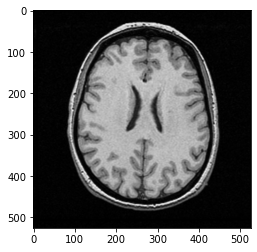

In [273]:
im=skio.imread('cerveau.tif')

plt.figure('Image originale')
plt.imshow(im,cmap='gray')
plt.show()

Fitting model on a small sub-sample of the data
done in 0.029s.
Predicting color indices on the full image (k-means)
done in 0.015s.


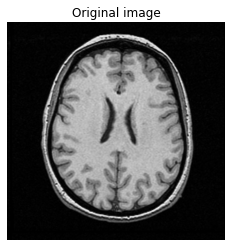

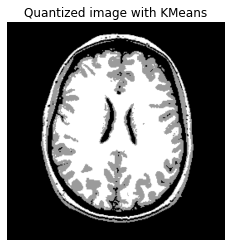

In [275]:
n_class = 3
ima = im
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
ima = np.array(ima, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(ima.shape)
d = 1
image_array = np.reshape(ima, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_class, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    image = np.zeros((w, h))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(ima,cmap='gray')

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with KMeans')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h),cmap='gray')
plt.show()